# known cluster host stars

In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
#get gaia ids
names = 'K2-25,K2-33,K2-95,K2-100,K2-136,K2-264,K2-284,CVSO 30,HD 222259A'.split(',')

gaiaids = {}
for name in names:
    try:
        t = cr.Target(name=name,verbose=False)
        d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True, radius=5)
        gaiaids[name] = t.gaiaid
    except Exception as e:
        print(f'{name}: {e}')

HD 222259A: use radius>5.0 arcsec


In [5]:
gaiaids

{'K2-25': 3311804515502788352,
 'K2-33': 6245758900889486720,
 'K2-95': 659744295638254336,
 'K2-100': 664337230586013312,
 'K2-136': 145916050683920128,
 'K2-264': 661167785238757376,
 'K2-284': 3413793491812093824,
 'CVSO 30': 3222255959210123904}

In [4]:
cc = cr.ClusterCatalog()

#query cluster catalog
df = cc.get_members_Bouma2019()
df.shape

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



(1040410, 20)

In [6]:
#check if gaia id of K2 cluster planets are in catalog
idx = df.source_id.astype(int).isin(gaiaids.values())
df[idx]

,source_id,clusters,reference,ext_catalog_name,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,k13_name_match,Cluster,how_match,not_in_k13,comment,k13_logt,k13_e_logt,distance
4516,145916050683920128,"Hyades,Hyades,Hyades,Hyades","GaiaCollaboration2018_tab1a,Roser_2011_Hyades,...","145916050683920128,377,145916050683920128,377",67.412861,22.882567,82.874210,-35.617093,16.849679,10.854518,11.564941,10.065458,NaN,Hyades,manual_check,True,known missing from K13,NaN,NaN,59.348313
231275,659744295638254336,"NGC_2632,Praesepe","CantatGaudin_2018,GaiaCollaboration2018_tab1a","659744295638254336,659744295638254336",129.362572,18.976620,-35.767834,-12.385583,5.535194,16.083649,17.453865,14.913969,NGC_2632,NGC_2632,string_match,False,NaN,8.92,NaN,180.662134
231408,661167785238757376,"Praesepe,NGC_2632,NGC_2632","GaiaCollaboration2018_tab1a,Kharchenko2013,Can...","661167785238757376,385277096,661167785238757376",131.358352,19.698401,-37.899743,-13.079422,5.359823,15.662463,16.946257,14.538236,NGC_2632,NGC_2632,string_match,False,NaN,8.92,NaN,186.573329
231791,664337230586013312,"NGC_2632,Praesepe","CantatGaudin_2018,GaiaCollaboration2018_tab1a","664337230586013312,664337230586013312",129.601086,20.106007,-36.144153,-13.014038,5.264482,10.405282,10.712832,9.966093,NGC_2632,NGC_2632,string_match,False,NaN,8.92,NaN,189.952198
501874,3222255959210123904,"ASCC_16,nan,ASCC_16,nan","CantatGaudin_2018,Zari_2018_PMS,CantatGaudin_2...","3222255959210123904,3222255959210123904,322225...",81.281492,1.573431,1.730875,0.128575,2.861397,15.123872,16.491316,13.961788,ASCC_16,ASCC_16,string_match,False,stellar association,7.00,NaN,349.479617
511021,3311804515502788352,Hyades,GaiaCollaboration2018_tab1a,3311804515502788352,63.273935,15.247703,122.148475,-18.337086,22.215303,14.381669,16.074886,13.119987,NaN,Hyades,manual_check,True,known missing from K13,NaN,NaN,45.014015
1051145,6245758900889486720,NaN,Zari_2018_PMS,6245758900889486720,242.561364,-19.319383,-9.709084,-23.986150,7.153004,14.156978,15.745092,12.928126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.801401


In [7]:
#k2-136: Hyades cluster
c = cr.Cluster(cluster_name='Hyades', catalog_name='Bouma2019')
hyades = c.query_catalog()
hyades.shape

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



(3216, 13)

In [8]:
#get pre-querried gaia info of each cluster member
hyades_mem = c.query_cluster_members_gaia_params()
hyades_mem.shape

Loaded: /home/jp/github/research/project/chronos/chronos/../data/Hyades_members.hdf5


(638, 95)

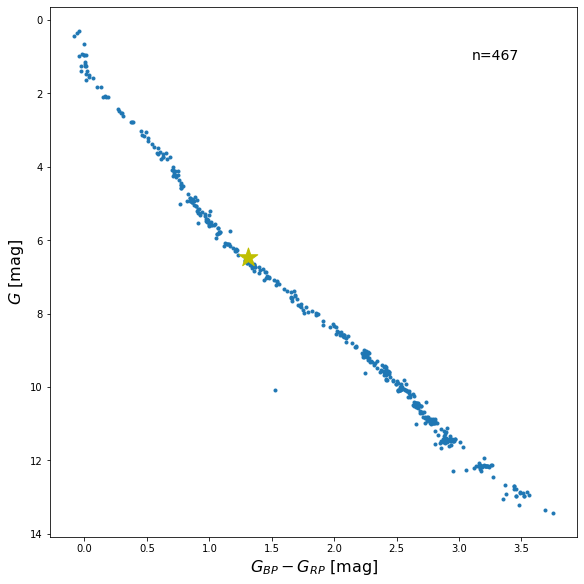

In [9]:
ax = cr.plot_cmd(df=hyades_mem, target_gaia_id=gaiaids['K2-136'])

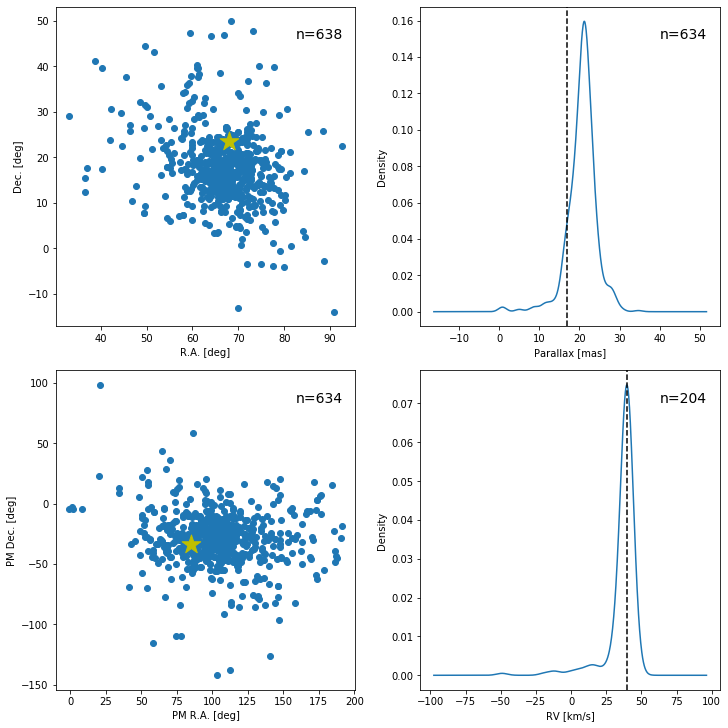

In [10]:
fig = cr.plot_rdp_pmrv(df=hyades_mem, target_gaia_id=gaiaids['K2-136'])

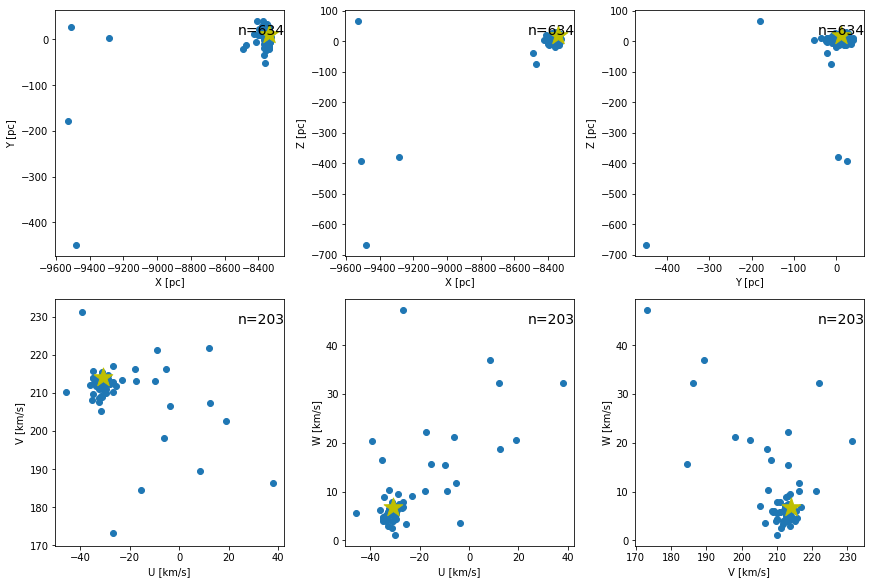

In [11]:
fig = cr.plot_xyz_uvw(df=hyades_mem, target_gaia_id=gaiaids['K2-136'])